In [1]:
# Load the dataset and obtain train_data, test_data, train_labels and test_labels for the first 10,000 most frequently occurring words

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [2]:
# Vectorize train and test data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train.shape)


(8982, 10000)


In [3]:
# Vectorize train and test labels

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
print(train_labels.shape)

(8982,)


In [17]:
# Create a model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [18]:
# Compile the model

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Create a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [20]:
# Train the model with 20 epochs

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 37ms/step - loss: 2.5558 - accuracy: 0.4334 - val_loss: 1.7583 - val_accuracy: 0.5890
Epoch 2/20
16/16 [==============================] - 0s 26ms/step - loss: 1.4399 - accuracy: 0.6855 - val_loss: 1.3266 - val_accuracy: 0.6750
Epoch 3/20
16/16 [==============================] - 0s 24ms/step - loss: 1.0670 - accuracy: 0.7632 - val_loss: 1.1391 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 0s 27ms/step - loss: 0.8457 - accuracy: 0.8141 - val_loss: 1.0401 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.6748 - accuracy: 0.8510 - val_loss: 0.9956 - val_accuracy: 0.7800
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 0.5397 - accuracy: 0.8874 - val_loss: 0.9361 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 0s 23ms/step - loss: 0.4327 - accuracy: 0.9072 - val_loss: 0.9247 - val_accuracy: 0.8190
Epoch 8/20
16

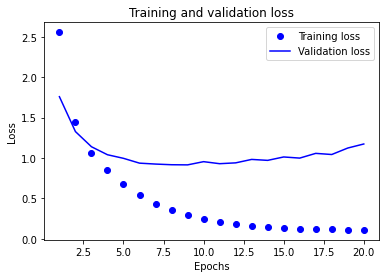

In [21]:
# Plot training and validation loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

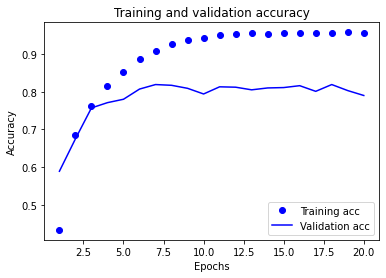

In [22]:
# Plot training and validation accuracy

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
# Retrain model from scratch and print results

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)
print("The model has an accuracy of ", results[1] * 100, "%")

Epoch 1/9
16/16 [==============================] - 1s 33ms/step - loss: 2.6666 - accuracy: 0.5318 - val_loss: 1.7750 - val_accuracy: 0.6390
Epoch 2/9
16/16 [==============================] - 0s 24ms/step - loss: 1.4468 - accuracy: 0.7016 - val_loss: 1.3368 - val_accuracy: 0.7090
Epoch 3/9
16/16 [==============================] - 0s 24ms/step - loss: 1.0704 - accuracy: 0.7666 - val_loss: 1.1607 - val_accuracy: 0.7350
Epoch 4/9
16/16 [==============================] - 0s 22ms/step - loss: 0.8526 - accuracy: 0.8165 - val_loss: 1.0539 - val_accuracy: 0.7750
Epoch 5/9
16/16 [==============================] - 0s 23ms/step - loss: 0.6858 - accuracy: 0.8540 - val_loss: 0.9956 - val_accuracy: 0.7820
Epoch 6/9
16/16 [==============================] - 0s 25ms/step - loss: 0.5571 - accuracy: 0.8827 - val_loss: 0.9383 - val_accuracy: 0.8040
Epoch 7/9
16/16 [==============================] - 0s 22ms/step - loss: 0.4488 - accuracy: 0.9070 - val_loss: 0.9169 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [24]:
# Predict new data with trained model

predictions = model.predict(x_test)
dim_pred = predictions[0].shape
pred_sum = np.sum(predictions[0])
pred_argmax = np.argmax(predictions[0])
print("Shape of predictions: ", dim_pred, "\nSum of predictions: ", pred_sum, "\nArgmax of predictions: ", pred_argmax)

Shape of predictions:  (46,) 
Sum of predictions:  0.99999994 
Argmax of predictions:  3
